In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv('Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


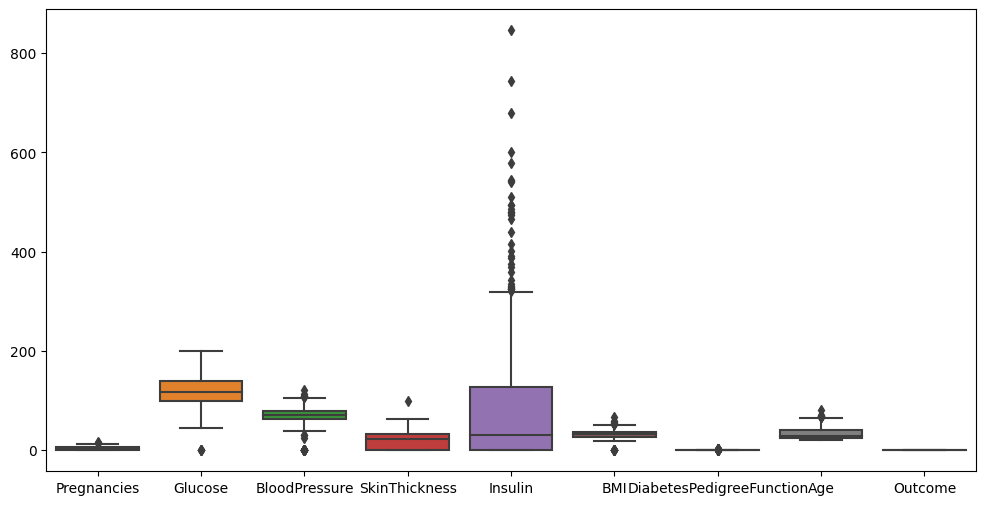

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)

plt.show()

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
X.shape, y.shape
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33


In [24]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train,y_train)
X_test_scaled=scaler.transform(X_test)

In [50]:
def find_best_classifier(X_train_scaled,X_test_scaled, y_train, y_test):
    from sklearn.model_selection import KFold
    cv=KFold(n_splits=5)
    logistics=LogisticRegression()
    svc=SVC()
    random_forest=RandomForestClassifier()
    
    logistics.fit(X_train_scaled,y_train)
   
    svc.fit(X_train_scaled,y_train)
  
    random_forest.fit(X_train_scaled,y_train)
    
    
    from sklearn.model_selection import GridSearchCV
    import warnings
    warnings.filterwarnings('ignore')
    parameters_logistic={
        'penalty':['l1','l2','elasticnet'],
        'C':[i for i in range (0,10)], 
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'multi_class':['ovr','multinomial']
        }
    clf_logistics=GridSearchCV(logistics,param_grid=parameters_logistic,cv=10)
    clf_logistics.fit(X_train_scaled,y_train)
    y_pred_logistics=clf_logistics.predict(X_test_scaled)
    
    parameters_svc={
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'degree': [2, 3, 4],
    }
    clf_svc=GridSearchCV(svc,param_grid=parameters_svc,cv=10)
    clf_svc.fit(X_train_scaled,y_train)
    y_pred_svc=clf_svc.predict(X_test_scaled)
    
    parameters_rf={
        'n_estimators': [100, 200, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
      
    }
    clf_rf=GridSearchCV(random_forest,param_grid=parameters_rf,cv=5, verbose=3,scoring='accuracy')
    clf_rf.fit(X_train_scaled,y_train)
    y_pred_rf=clf_rf.predict(X_test_scaled)
    
    A_svc=accuracy_score(y_pred_svc,y_test)
    A_l=accuracy_score(y_pred_logistics,y_test)
    A_rf=accuracy_score(y_pred_rf,y_test)
    
    print("For SVC Classification")
    print(confusion_matrix(y_pred_svc,y_test))
    print(A_svc)
    print(recall_score(y_pred_svc,y_test))

    print("For Logistic Classification")
    print(confusion_matrix(y_pred_logistics,y_test))
    print(A_l)
    print(recall_score(y_pred_logistics,y_test))
    
    print("For Random Forest Classification")
    print(confusion_matrix(y_pred_rf,y_test))
    print(A_rf)
    print(recall_score(y_pred_rf,y_test))



In [51]:
find_best_classifier(X_train_scaled,X_test_scaled, y_train, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.789 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.748 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.740 total time=   0.2s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.770 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.764 total time=   0.4s
[CV 2/5] END bootstrap=T

In [43]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters_log={
        'penalty':['l1','l2','elasticnet'],
        'C':[i for i in range (0,10)], 
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'multi_class':['ovr','multinomial']
}
logi=LogisticRegression()
logi.fit(X_train_scaled,y_train)
clf_log=GridSearchCV(logi,param_grid=parameters_log,cv=10)
clf_log.fit(X_train_scaled,y_train)
y_pred_log=clf_log.predict(X_test_scaled)


In [45]:
print(confusion_matrix(y_pred_log,y_test))
print(accuracy_score(y_pred_log,y_test))
print(recall_score(y_pred_log,y_test))

[[82 19]
 [17 36]]
0.7662337662337663
0.6792452830188679


In [53]:
import pickle
pickle.dump(logi, open('Diabetes_prediction.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))